In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [6]:
# Saves to csv
tips.to_csv('tips.csv')

In [7]:
## Inbuilt seaborn data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.sex.value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [10]:
tips.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [11]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [13]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [14]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
tips.shape

(244, 7)

In [16]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### Distplot 

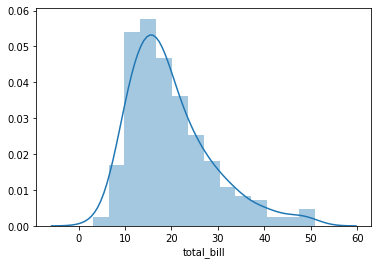

In [17]:
#Shows the distribution of the data of numerical columns 
sns.distplot(tips['total_bill'])

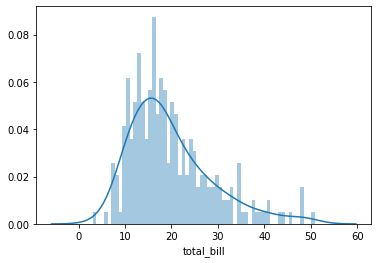

In [24]:
# To remove the kde we can just say its false and also define the bins
sns.distplot(tips['total_bill'],kde=True,bins=60)

### Joint plot

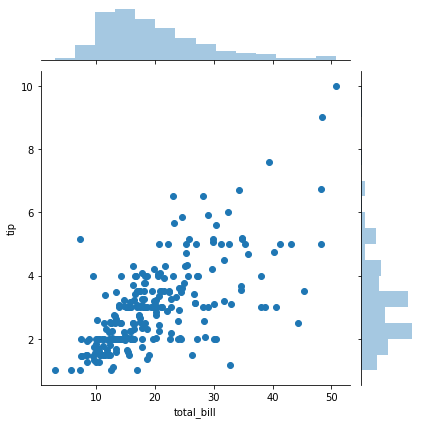

In [25]:
# Helps us compare two variables together 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

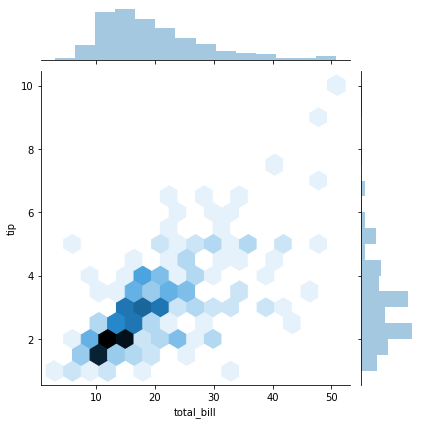

In [26]:
# Here we are showing the data hexagonically 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

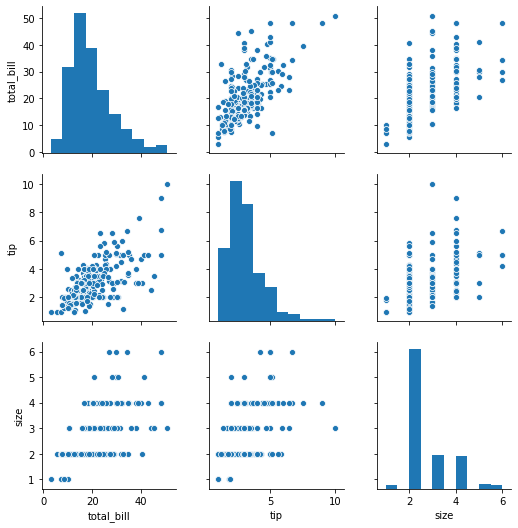

In [27]:
# Shows the relationship between the numerical columns of the data frame
sns.pairplot(tips)

### Rug plot


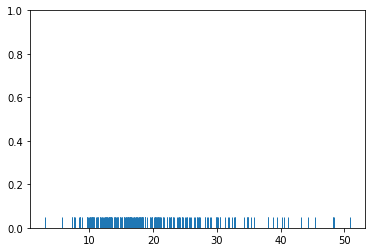

In [28]:
# 
sns.rugplot(tips['total_bill'])

In [30]:
tips.total_bill.isnull().sum()

0

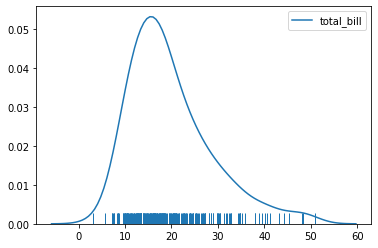

In [31]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

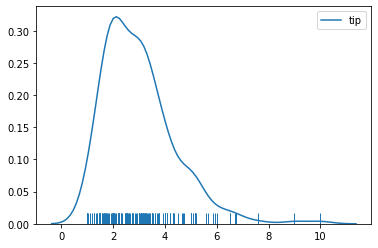

In [32]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Grids

In [33]:
import matplotlib.pyplot as plt

In [34]:
iris = sns.load_dataset('iris')

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
iris.species.unique()

### Pair Grid

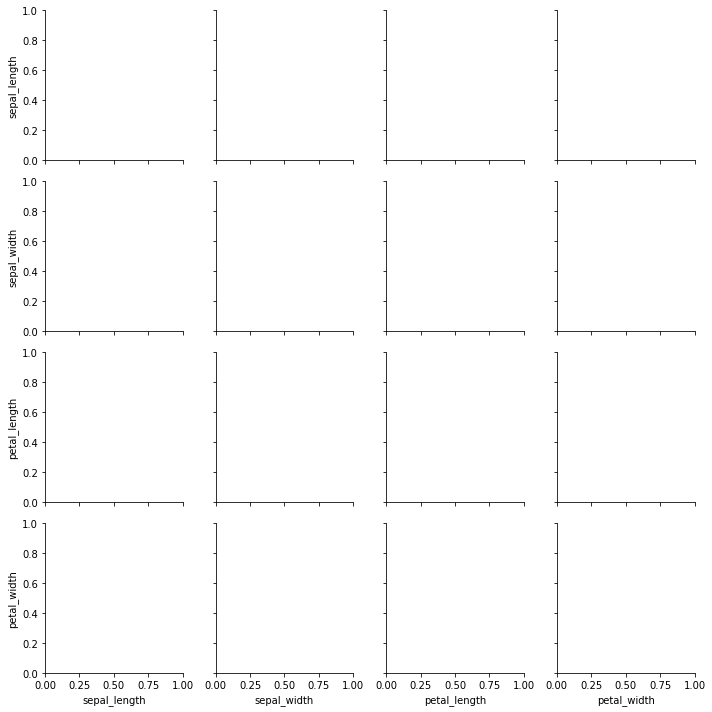

In [39]:
# Just the Grid
sns.PairGrid(iris)

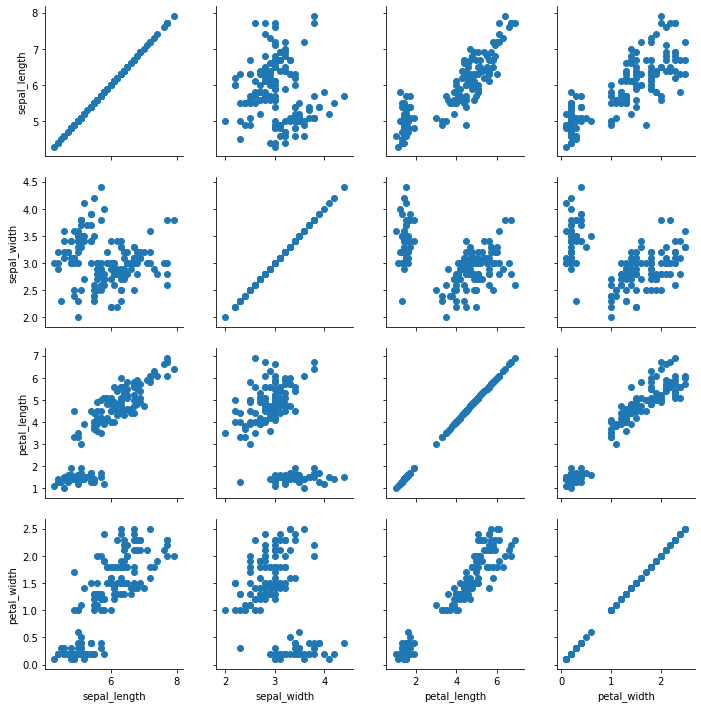

In [40]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

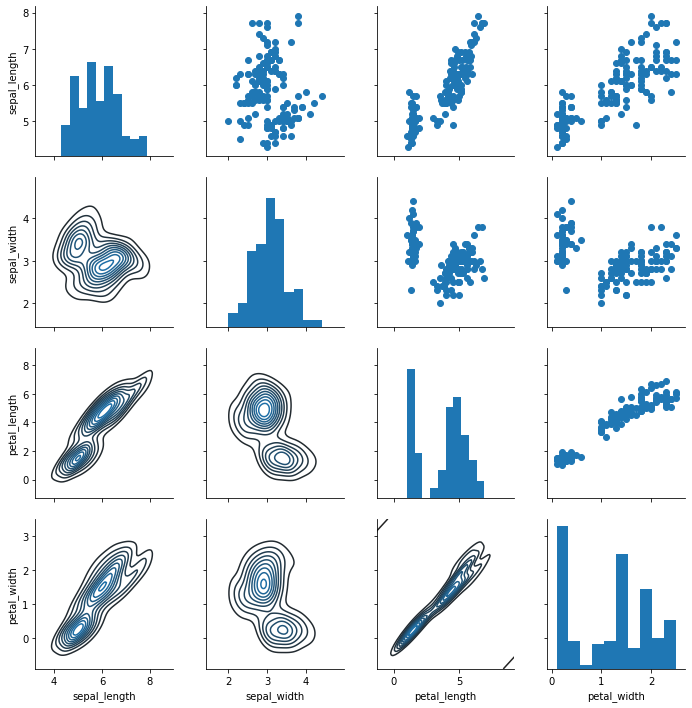

In [41]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### Pairplot

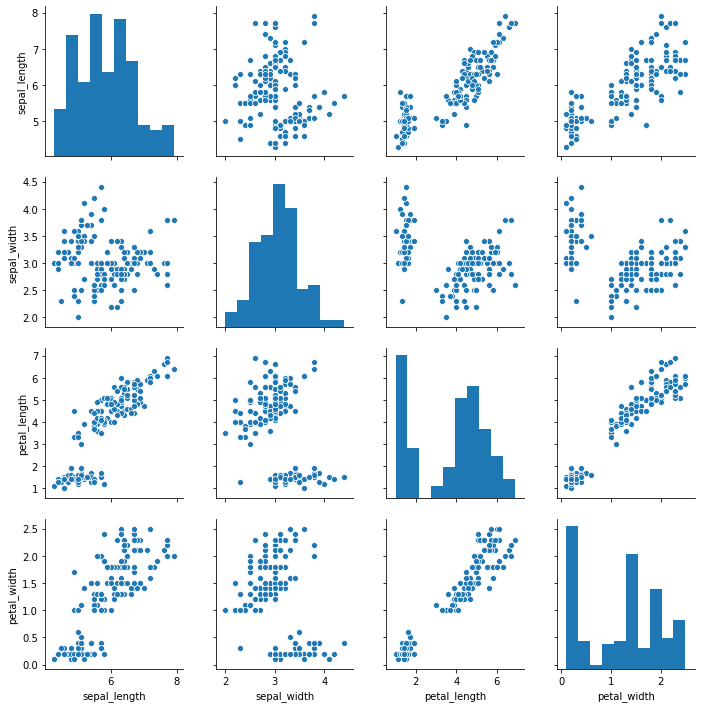

In [44]:
sns.pairplot(iris)

In [45]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
iris.species.value_counts(normalize=True)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

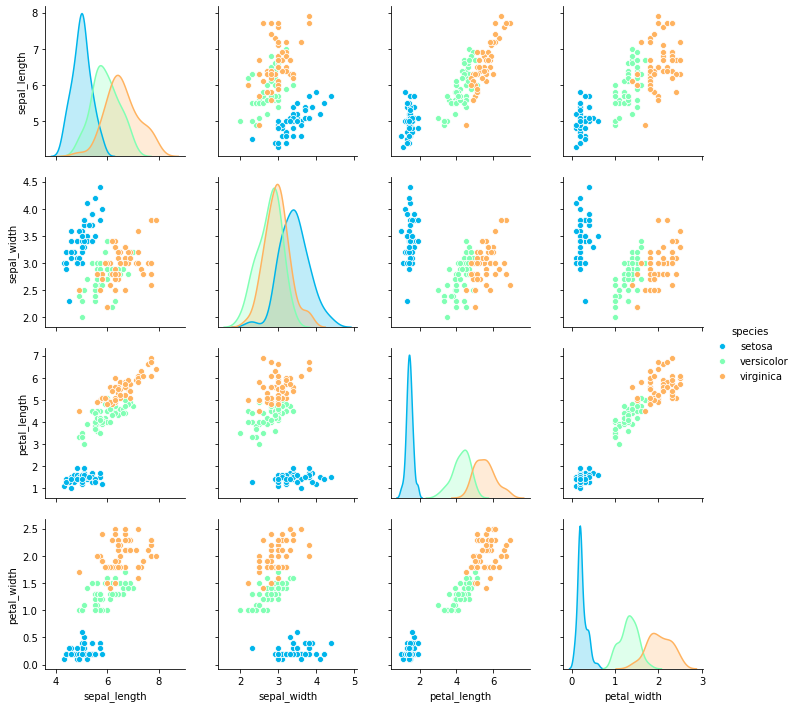

In [43]:
sns.pairplot(iris,hue='species',palette='rainbow')

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [49]:
tips.smoker.unique()

[No, Yes]
Categories (2, object): [No, Yes]

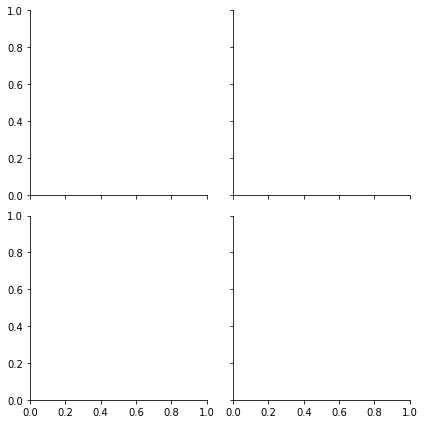

In [50]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

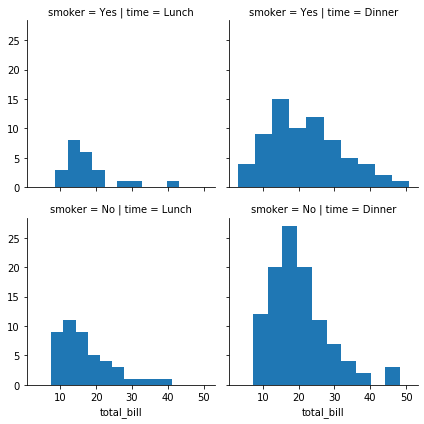

In [52]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

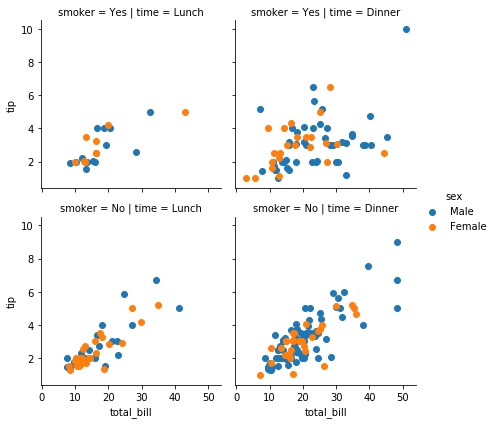

In [53]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

### JointGrid

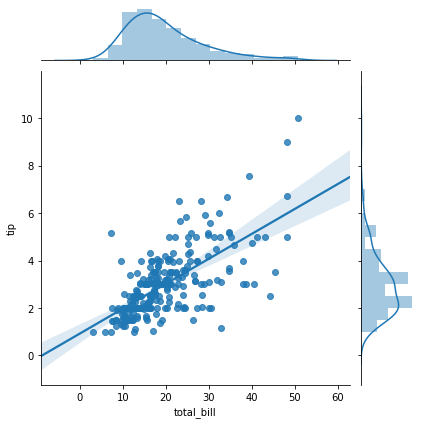

In [54]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

### Matrix Plots
Matrix plots often show data in clusters

In [56]:
flights = sns.load_dataset('flights')

In [58]:
flights.to_csv('Flights.csv')

In [61]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [62]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


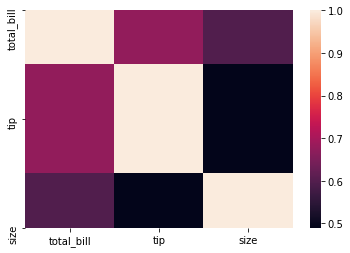

In [63]:
sns.heatmap(tips.corr())

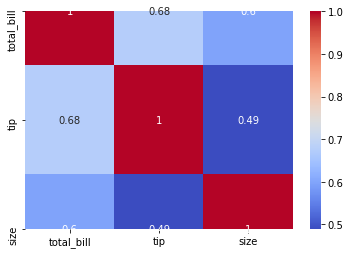

In [64]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [65]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


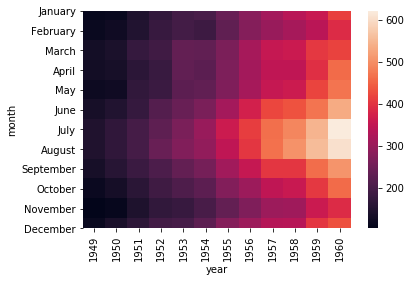

In [70]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

In [67]:
type(pvflights)

pandas.core.frame.DataFrame

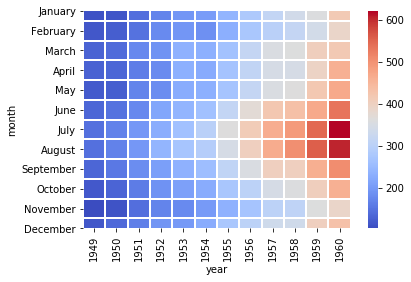

In [72]:
sns.heatmap(pvflights,cmap='coolwarm',linecolor='white',linewidths=1)

### Cluster Map

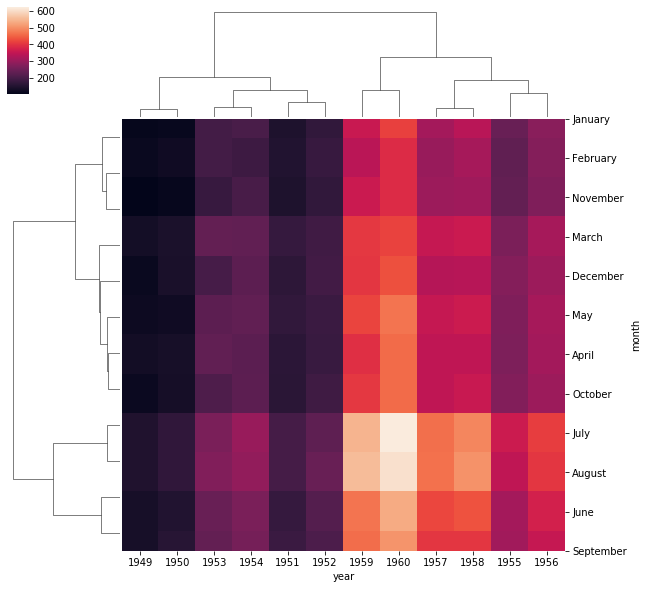

In [73]:
sns.clustermap(pvflights)
# Information is grouped by passenger count

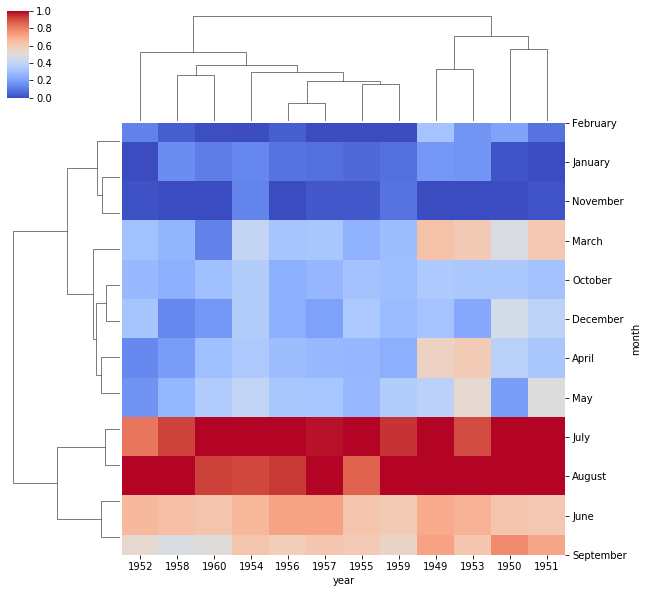

In [74]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

### Regression plots

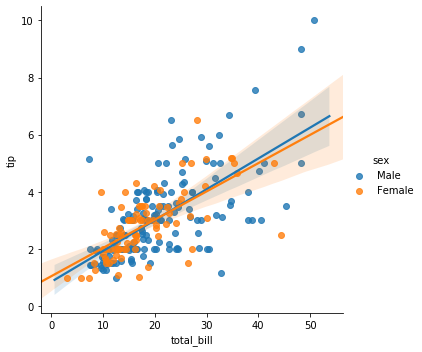

In [79]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex')

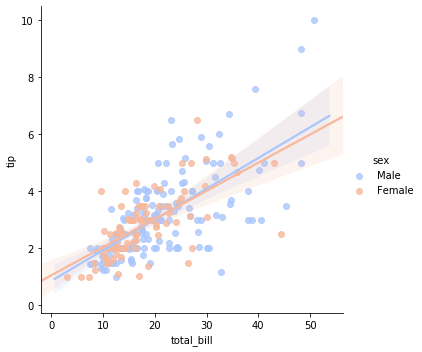

In [80]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Categorical Variables

#### Barplot

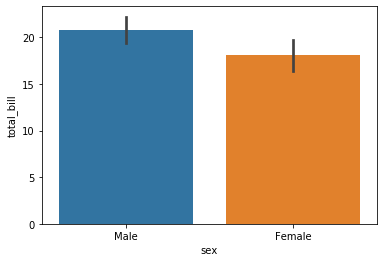

In [81]:
# Uses a function as the estimator. In this case its the mean. 
sns.barplot(x='sex',y='total_bill',data=tips)

### Count plot

In [82]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

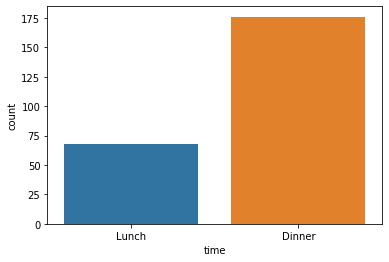

In [84]:
#Basically returns the counts for Male and female
sns.countplot(x='time',data=tips)

### Box plots and Violin plots
Boxplots and violinplots are used to show the distribution of categorical data.

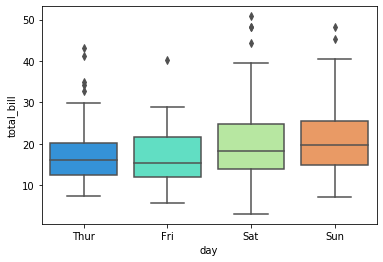

In [85]:
#Distribution of days in relation to the total bill column
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [86]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


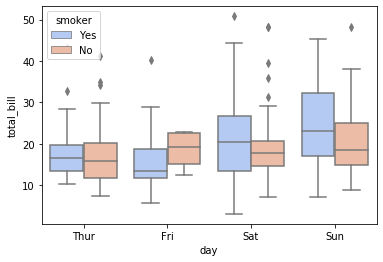

In [87]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### Violin Plot

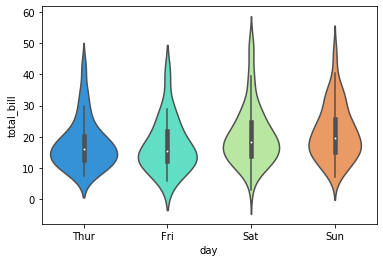

In [88]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

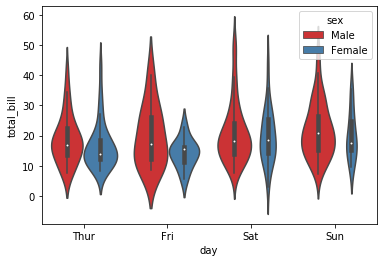

In [89]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1', scale='count')

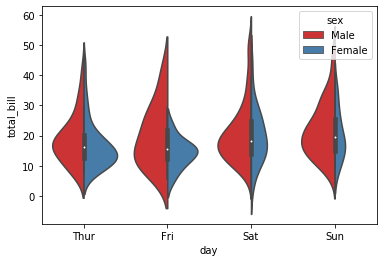

In [90]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1', scale = 'count')

### Stripplot

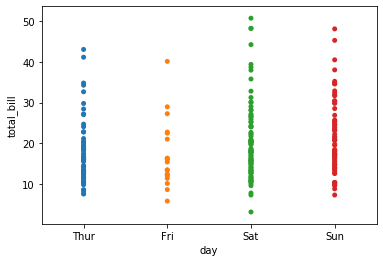

In [93]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=False)

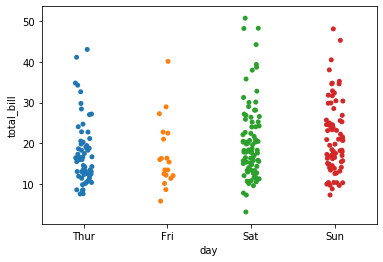

In [94]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

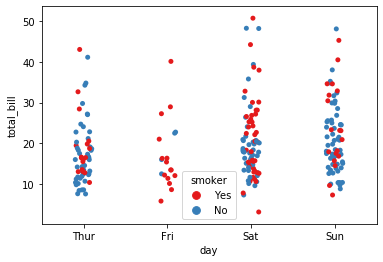

In [97]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='smoker',palette='Set1')

/home/mb/.local/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


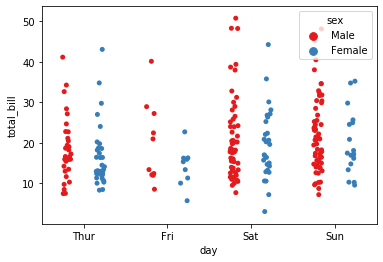

In [98]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

### Swarmplot

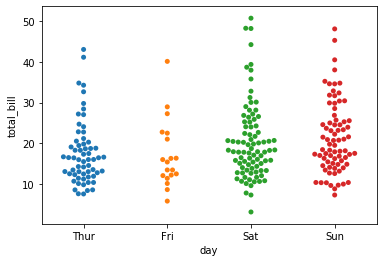

In [99]:
sns.swarmplot(x="day", y="total_bill", data=tips)

/home/mb/.local/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


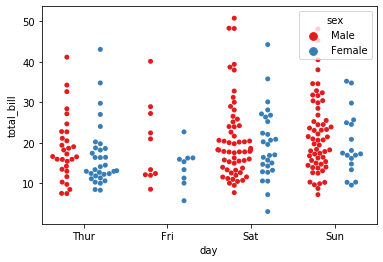

In [100]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

###  To change figure size

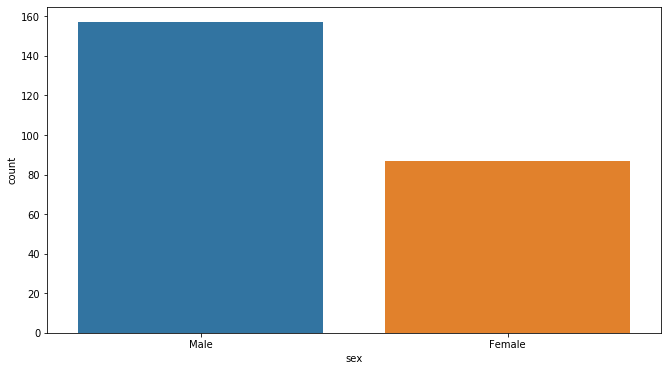

In [101]:
# Non Grid Plot
plt.figure(figsize=(11,6))
sns.countplot(x='sex',data=tips)

#### - For more information, consult the documentation. 
https://seaborn.pydata.org/